# Project Setup

In [1]:
### Import Libraries and Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Data Loading & Exploration

In [2]:
# Data loading and initial exploration

# Load dataset
df = pd.read_csv('data/coupons.csv')
print("data overview")
print(f"dataset shape: {df.shape}")
print(f"total records: {df.shape[0]}")
print(f"total features: {df.shape[1]}")

# Display columns
print(f"{df.columns}")

print("column names and data types:")
for i, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    print(f"{i:2}. {col:<25} ({dtype})")

# Sample data
display(df.head())

data overview
dataset shape: (12684, 26)
total records: 12684
total features: 26
Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')
column names and data types:
 1. destination               (object)
 2. passanger                 (object)
 3. weather                   (object)
 4. temperature               (int64)
 5. time                      (object)
 6. coupon                    (object)
 7. expiration                (object)
 8. gender                    (object)
 9. age                       (object)
10. maritalStatus             (object)
11. has_children              (int64)
12. education                 (object

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# Check & Fix Missing Values + Explore Data Frame Basic Stats

In [3]:
# Missing Values & Stats

# check for missing values
missing_values = df.isnull().sum()

if missing_values.sum() > 0:
    missing_df = pd.DataFrame({
        'Column': missing_values.index,
        'Missing_Count': missing_values.values,
    })
    missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
    print("Columns with missing values:")
    display(missing_df)
else:
    print("No missing values")

# Stats for numerical columns
print(f"Column Stats")
# Return a dataframe containing only numerical columns and extract just the column name
numerical_cols = df.select_dtypes(include=[np.number]).columns
# Create a subset dataframe
display(df[numerical_cols].describe())

Columns with missing values:


,Column,Missing_Count
14,car,12576
16,CoffeeHouse,217
19,Restaurant20To50,189
17,CarryAway,151
18,RestaurantLessThan20,130
15,Bar,107


Column Stats


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


# Target Variable Analysis – Coupon Acceptance Variable

In [4]:
# Target Variable Analysis

# Analyze the Coupon Acceptance variable
target_counts = df['Y'].value_counts().sort_index()
# Convert counts to percentages
target_rates = df['Y'].value_counts(normalize=True).sort_index()

print("Coupon Acceptance Distribution:")
print(f"Rejected: {target_counts[0]:,} customers ({target_rates[0]:.1%} of people rejected)")
print(f"Accepted: {target_counts[1]:,} customers ({target_rates[1]:.1%} of people accepted)")
overall_acceptance_rate = df['Y'].mean()
print(f"\nOverall Acceptance Rate: {overall_acceptance_rate:.1%}")

Coupon Acceptance Distribution:
Rejected: 5,474 customers (43.2% of people rejected)
Accepted: 7,210 customers (56.8% of people accepted)

Overall Acceptance Rate: 56.8%


# Visualize Coupon Acceptance Variable (Basic – One Variable)

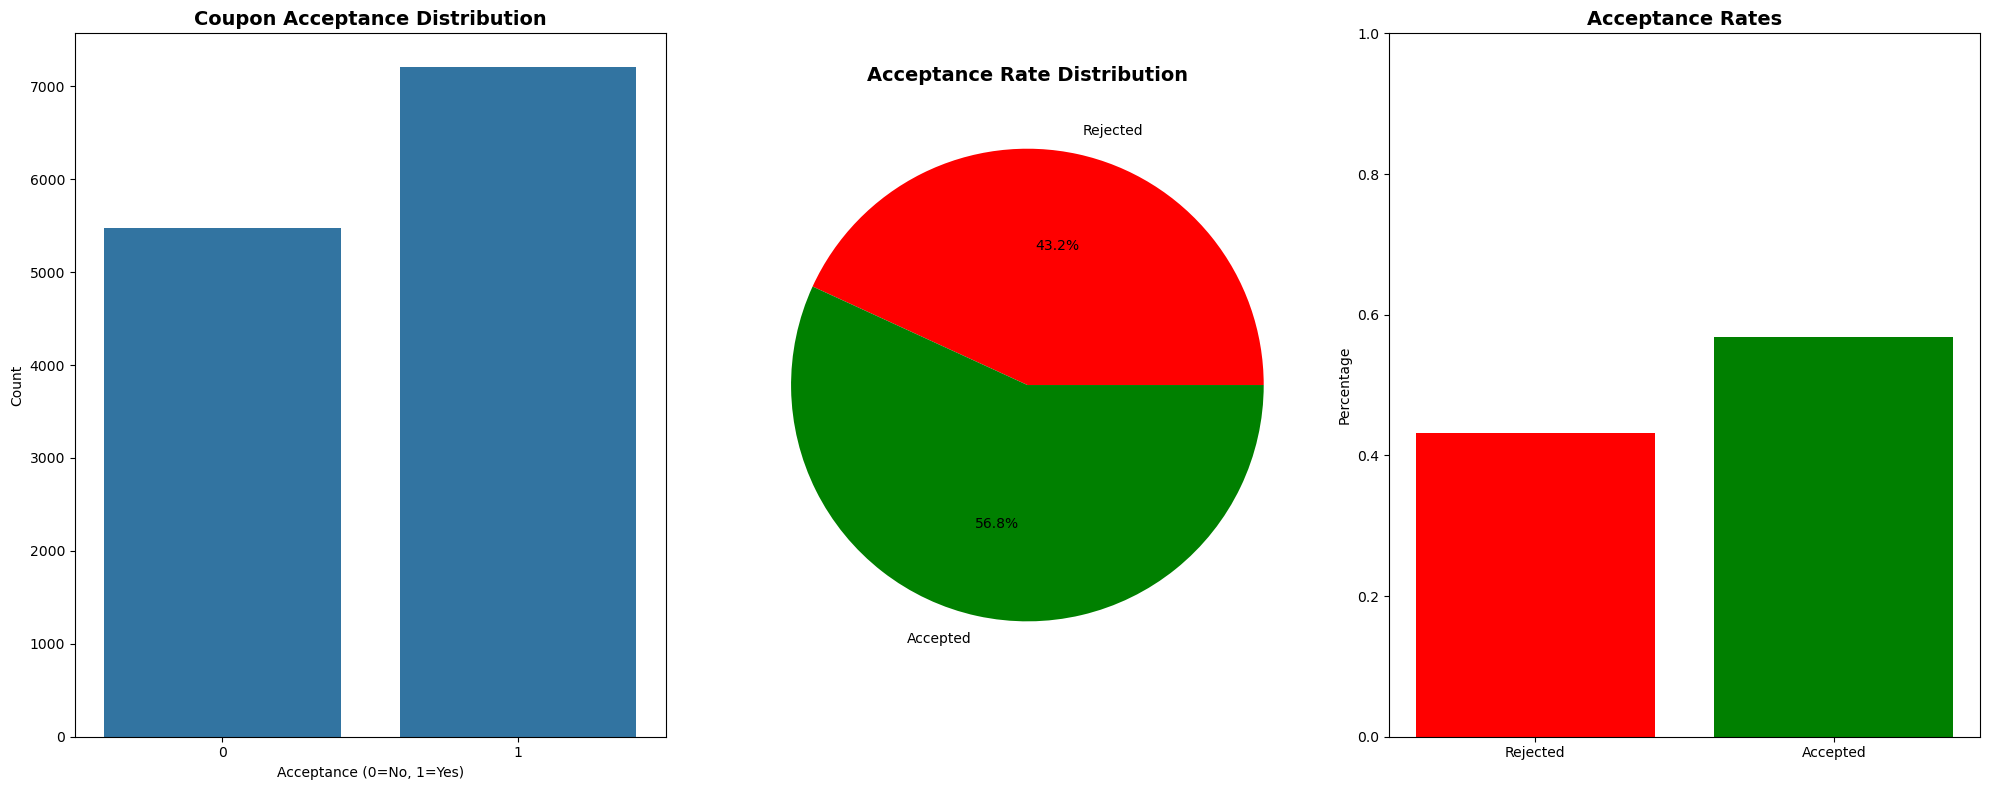

In [25]:
# Visualize Coupon Acceptance Variable

# Create a figure wih 3 subplots arranged in 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Count plot generation
sns.countplot(data=df, x='Y', ax=axes[0])
# Creates a bar chart showing raw counts of 0s and 1s in the 'Y' column
axes[0].set_title('Coupon Acceptance Distribution', fontsize=14, fontweight='bold')
# Adds title, x-label, and y-label
axes[0].set_xlabel('Acceptance (0=No, 1=Yes)')
axes[0].set_ylabel('Count')

# Pie chart generation
axes[1].pie(target_counts.values, labels=['Rejected', 'Accepted'], 
           autopct='%1.1f%%', colors=['red', 'green'])
axes[1].set_title('Acceptance Rate Distribution', fontsize=14, fontweight='bold')

# Bar chart with percentages
bars = axes[2].bar(['Rejected', 'Accepted'], target_rates.values, color=['red', 'green'])
axes[2].set_title('Acceptance Rates', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Percentage')
# Sets y-axis limits from 0 to 1 (0% to 100%)
axes[2].set_ylim(0, 1)

plt.tight_layout()
plt.show()

In [ ]:
# Coupon Type Analysis